In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

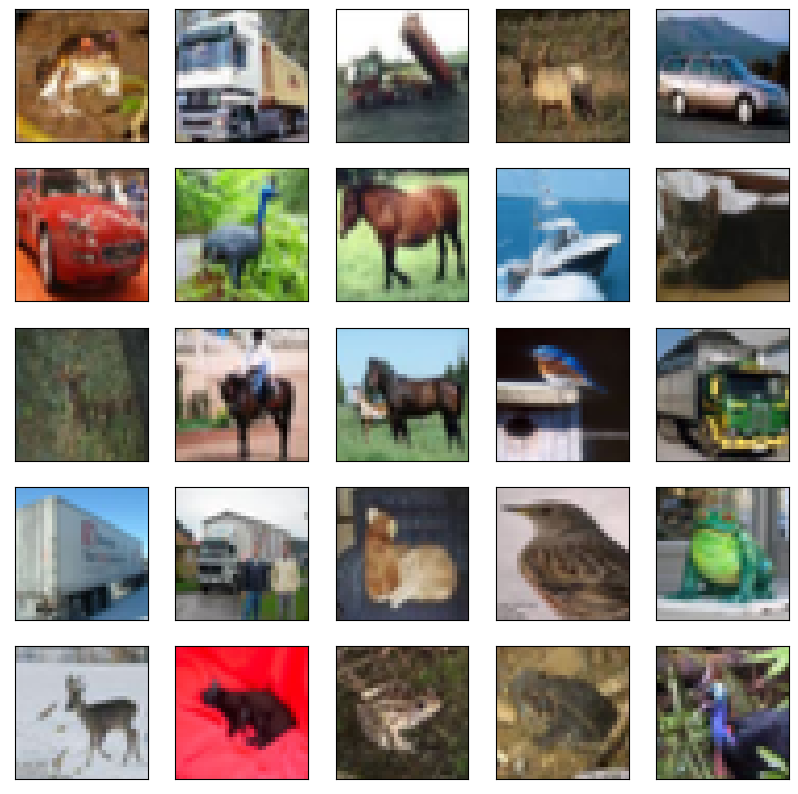

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for j in range(25,50):
    i = j-25
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    # plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [11]:
model = models.Sequential([  
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(.1),
  
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(.1),
  
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.Dropout(.1),

  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10),
])


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 6, 6, 64)         

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


2023-01-26 14:51:00.405642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 1.5425 - accuracy: 0.4343

2023-01-26 14:51:20.031651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 23s 13ms/step - loss: 1.5425 - accuracy: 0.4343 - val_loss: 1.3117 - val_accuracy: 0.5324
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1797 - accuracy: 0.5808 - val_loss: 1.0554 - val_accuracy: 0.6276
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0325 - accuracy: 0.6370 - val_loss: 0.9918 - val_accuracy: 0.6546
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9446 - accuracy: 0.6672 - val_loss: 0.9210 - val_accuracy: 0.6811
Epoch 5/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8826 - accuracy: 0.6896 - val_loss: 0.9015 - val_accuracy: 0.6904
Epoch 6/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8312 - accuracy: 0.7076 - val_loss: 0.8898 - val_accuracy: 0.6934
Epoch 7/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.7891 - accuracy: 0.7239 - val_loss: 0.8414 - val_accura

313/313 - 2s - loss: 0.8625 - accuracy: 0.7060 - 2s/epoch - 5ms/step


(0.8624976873397827, 0.706000030040741)

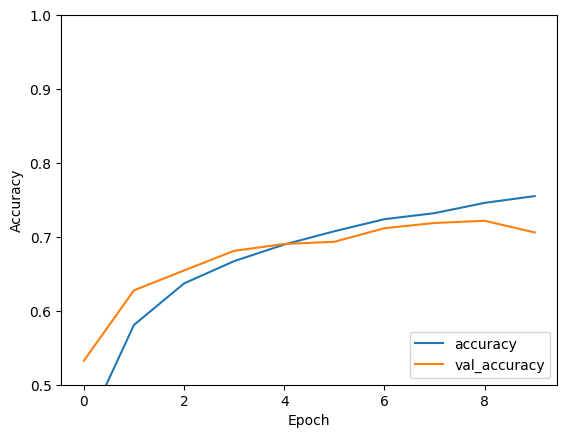

In [13]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
test_loss, test_acc